In [22]:
import pandas as pd
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from PIL import Image
import numpy as np
import contractions
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from PIL import Image

from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib.axes import Axes

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stopwords_en = stopwords.words('english')

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /home/ae/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ae/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df = pd.read_pickle('../scripts/dirty_chunks_no_str')
df

,language,source
0,Markdown,# Contributing\n| Component | Build Status |\n...
1,Markdown,**Build Repo :** To build all Client and Manag...
2,Markdown,2. From the root directory\n3. Invoke `msbuild...
3,Markdown,If for any reason there is an update to the bu...
4,Markdown,"```\nWhen run, the code regions in the format ..."
...,...,...
40315,Python,"(shader, hlsl, args)\n remove_file(spirv)\nde..."
40316,C,/*\n * Copyright 2015-2017 ARM Limited\n * SPD...
40317,C,/* Smoke test for the C API. */\n#ifdef _MSC_V...
40318,C,"\tfor (i = 0; i < count; i++)\n\t{\n\tprintf(""..."


In [15]:
def nube(ngramas, series, arr: Axes, name, mask = None):
  if mask is not None:
    mask = np.array(Image.open(mask))

  wordcloud = WordCloud(
      width=1200, height=1200,
      colormap = 'YlOrRd',
      background_color='black',
      min_font_size= 4,
      mask= mask
  ).generate_from_frequencies(generate_ngrams(ngramas, series))


  arr.figure.set_size_inches(10, 10)
  arr.figure.tight_layout()
  arr.imshow(wordcloud)
  arr.set_title(name)
  arr.axis("off")

In [24]:
def generate_ngrams(n: int, arreglo):
  x = []

  for texto in arreglo['source_clean']:
    n_grams = ngrams(word_tokenize(texto), n)
    for ngram in n_grams:
      resultado = ' '.join(ngram)
      x += [resultado]

  return pd.Series(x).value_counts()

def pre_procesamiento(texto):
  texto = texto.lower()
  texto = contractions.fix(texto)
  texto = re.sub(r'[^A-Za-z\s]', ' ', texto)
  tokens = word_tokenize(texto)

  lemma = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_en]
  return ' '.join(lemma)

In [23]:
df['source_clean'] = df['source'].apply(pre_procesamiento)

/tmp/ipykernel_1591389/2471369160.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


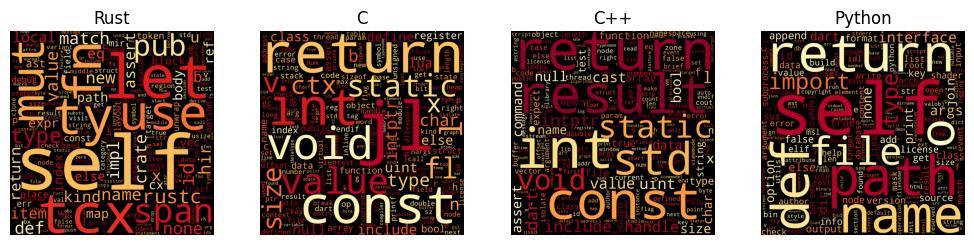

In [25]:
f, axarr = plt.subplots(1,4)
nube(1, df[df['language'] == 'Rust'], axarr[0], "Rust")
nube(1, df[df['language'] == 'C'], axarr[1], "C")
nube(1, df[df['language'] == 'C++'], axarr[2], "C++")
nube(1, df[df['language'] == 'Python'], axarr[3], "Python")

f.show()

/tmp/ipykernel_1591389/696147491.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


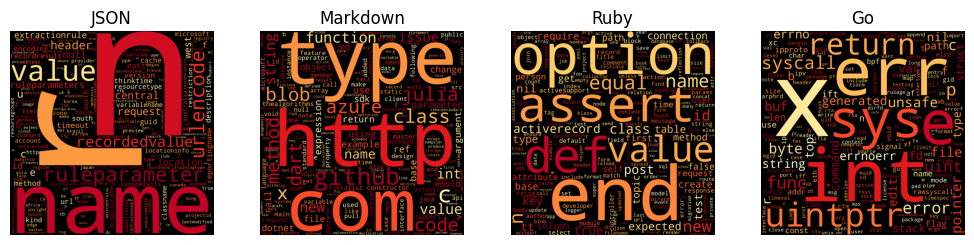

In [29]:
f, axarr = plt.subplots(1,4)
nube(1, df[df['language'] == 'JSON'], axarr[0], "JSON")
nube(1, df[df['language'] == 'Markdown'], axarr[1], "Markdown")
nube(1, df[df['language'] == 'Ruby'], axarr[2], "Ruby")
nube(1, df[df['language'] == 'Go'], axarr[3], "Go")

f.show()

/tmp/ipykernel_1591389/1283352321.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


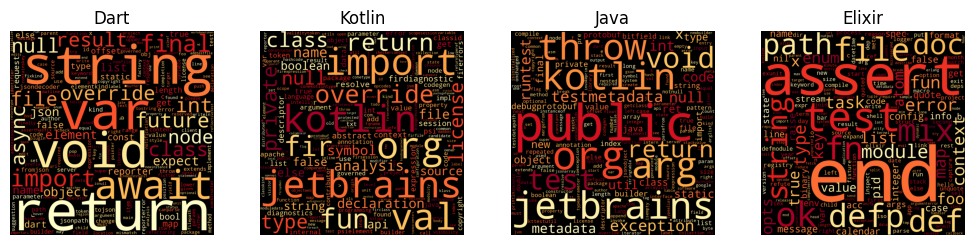

In [28]:
f, axarr = plt.subplots(1,4)
nube(1, df[df['language'] == 'Dart'], axarr[0], "Dart")
nube(1, df[df['language'] == 'Kotlin'], axarr[1], "Kotlin")
nube(1, df[df['language'] == 'Java'], axarr[2], "Java")
nube(1, df[df['language'] == 'Elixir'], axarr[3], "Elixir")

f.show()